# Capstone Webscrapping using BeautifulSoup

(Please insert the background here )



*This project aims to scrap data from the imdb website.We sort and scrap data of the popular movies/tv series in 2019.
 The following dependencies are required to perform webscraping
 
 .install `beautifulsoup4`
  .instal `pandas`
  .install `flask`
   .install `matplotlib`

*we use request.get in order to call the data from imdb.com

In [1]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:777]

b'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2019-01-01 and 2019-12-31\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t'

*the code below transforms a complex HTML document into a complex tree of python object

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 1045 character. 

In [4]:
print(soup.prettify()[:1045])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'functi

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

*By using inspect element we found couple identifiers such as div,class and article as the key to sort and extract data.


In [5]:
table = soup.find('div', attrs={'class':'article'})
print(table.prettify()[0:1000])

<div class="article">
 <h1 class="header">
  Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending)
 </h1>
 <div class="nav">
  <br class="clear"/>
  <div class="display-mode float-right">
   View Mode:
   <a class="compact" href="/search/title/?release_date=2019-01-01,2019-12-31&amp;view=simple">
    Compact
   </a>
   <span class="ghost">
    |
   </span>
   <a class="detailed" href="/search/title/?release_date=2019-01-01,2019-12-31&amp;view=advanced">
    <strong>
     Detailed
    </strong>
   </a>
  </div>
  <div class="desc">
   <span>
    1-50 of 325,184 titles.
   </span>
   <span class="ghost">
    |
   </span>
   <a class="lister-page-next next-page" href="/search/title/?release_date=2019-01-01,2019-12-31&amp;start=51">
    Next »
   </a>
  </div>
 </div>
 <br class="clear"/>
 <div class="sorting">
  Sort by:
  <a href="/search/title/?release_date=2019-01-01,2019-12-31&amp;sort=moviemeter,desc">
   <strong>
    Popularity
   </strong>
   ▲
  </a>
  <span 

*in this columns we use looping to make our job easier. We found the unique identifer of each movie columns are 'class' and 'lister-item-content'. In this column we use looping to sort information from the 50 movies column in IMDB 

In [6]:
tr=table.find_all('div', attrs={'class':'lister-item-content'})
table

<div class="article">
<h1 class="header">Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) </h1>
<div class="nav">
<br class="clear"/>
<div class="display-mode float-right">
        View Mode:
<a class="compact" href="/search/title/?release_date=2019-01-01,2019-12-31&amp;view=simple"> Compact
</a> <span class="ghost">|</span><a class="detailed" href="/search/title/?release_date=2019-01-01,2019-12-31&amp;view=advanced"> <strong>Detailed</strong>
</a> </div>
<div class="desc">
<span>1-50 of 325,184 titles.</span>
<span class="ghost">|</span> <a class="lister-page-next next-page" href="/search/title/?release_date=2019-01-01,2019-12-31&amp;start=51">Next »</a>
</div>
</div>
<br class="clear"/>
<div class="sorting">
       Sort by:
           <a href="/search/title/?release_date=2019-01-01,2019-12-31&amp;sort=moviemeter,desc"><strong>Popularity</strong>▲</a>
<span class="ghost">|</span> <a href="/search/title/?release_date=2019-01-01,2019-12-31&amp;sort=alpha,asc">

*we verify if the right amount of data is scraped by using len(table)

Do the scrapping process here (please change this markdown with your explanation)

* In this column we take the data object and transform it into an array. first we use iteration in the 'row' with identifier 'div','class','lister-item-content'.We then use each unique identifier for title_movie('a'),rating_movie ('strong'), metascore_movie('span', 'class','metascore favorable'),and movie_votes('span', attrs='name','nv')

We then use append to add the column title_movie,rating_movie,metascore_movie,movie_votes

In [7]:
temp = [] 

for i in range(0, len(table)):
    row= table.find_all('div',attrs={'class':'lister-item-content'})[i]
    
    
    judul=row.find_all('a')[0].text
    
    imdb_rating=row.find_all('strong')[0].text
    
    metascore=row.find('span', attrs={'class':'metascore favorable'})
    if metascore is not None:
        metascore=metascore.text.strip()
    else:
        metascore=None
        
    votes=row.find_all('span', attrs={'name':'nv'})[0].text
    
    temp.append((judul,imdb_rating,metascore,votes))
    

 
    
temp 

[('The Umbrella Academy', '8.0', None, '115,769'),
 ('The Boys', '8.7', None, '157,861'),
 ('Knives Out', '7.9', '82', '363,340'),
 ('Jojo Rabbit', '7.9', None, '244,973'),
 ('Doom Patrol', '8.0', None, '28,731'),
 ('Euphoria', '8.3', None, '44,843'),
 ('In the Dark', '7.4', None, '4,942'),
 ('The Gentlemen', '7.9', None, '171,690'),
 ("Charlie's Angels", '4.7', None, '47,747'),
 ('Once Upon a Time... in Hollywood', '7.7', '83', '499,627'),
 ('The Mandalorian', '8.7', None, '182,489'),
 ('Joker', '8.5', None, '840,069'),
 ('Avengers: Endgame', '8.4', '78', '747,099'),
 ('Watchmen', '8.1', None, '74,977'),
 ('Waiting for the Barbarians', '5.9', None, '1,295'),
 ('Gisaengchung', '8.6', '96', '459,593'),
 ('The Witcher', '8.2', None, '264,666')]

we display our dataset by writting the columns that we extracted from above

In [8]:
import pandas as pd
df=pd.DataFrame(temp,columns=('Judul','Imdb_Rating','Metascore','Votes'))
df.head()

,Judul,Imdb_Rating,Metascore,Votes
0,The Umbrella Academy,8.0,None,"115,769"
1,The Boys,8.7,None,"157,861"
2,Knives Out,7.9,82,"363,340"
3,Jojo Rabbit,7.9,None,"244,973"
4,Doom Patrol,8.0,None,"28,731"


We use the labmda function to convert movie vote from using , into .

In [9]:
df['Votes']=df['Votes'].apply(lambda x:x.replace(',','.'))
df.head()

,Judul,Imdb_Rating,Metascore,Votes
0,The Umbrella Academy,8.0,None,115.769
1,The Boys,8.7,None,157.861
2,Knives Out,7.9,82,363.340
3,Jojo Rabbit,7.9,None,244.973
4,Doom Patrol,8.0,None,28.731


we use coerce function as part of data cleansing and to push away any error.

In [10]:
df['Metascore']=pd.to_numeric(df['Metascore'],errors='coerce')
df

,Judul,Imdb_Rating,Metascore,Votes
0,The Umbrella Academy,8.0,NaN,115.769
1,The Boys,8.7,NaN,157.861
2,Knives Out,7.9,82.0,363.340
3,Jojo Rabbit,7.9,NaN,244.973
4,Doom Patrol,8.0,NaN,28.731
5,Euphoria,8.3,NaN,44.843
6,In the Dark,7.4,NaN,4.942
7,The Gentlemen,7.9,NaN,171.690
8,Charlie's Angels,4.7,NaN,47.747
9,Once Upon a Time... in Hollywood,7.7,83.0,499.627


In [11]:
df.head()

,Judul,Imdb_Rating,Metascore,Votes
0,The Umbrella Academy,8.0,NaN,115.769
1,The Boys,8.7,NaN,157.861
2,Knives Out,7.9,82.0,363.340
3,Jojo Rabbit,7.9,NaN,244.973
4,Doom Patrol,8.0,NaN,28.731


In [12]:
df.dtypes

Judul           object
Imdb_Rating     object
Metascore      float64
Votes           object
dtype: object

Changing the datatypes from object to Float

In [13]:
df[['Imdb_Rating','Votes']]=df[['Imdb_Rating','Votes']].astype('float64')

In [14]:
df.head()

,Judul,Imdb_Rating,Metascore,Votes
0,The Umbrella Academy,8.0,NaN,115.769
1,The Boys,8.7,NaN,157.861
2,Knives Out,7.9,82.0,363.340
3,Jojo Rabbit,7.9,NaN,244.973
4,Doom Patrol,8.0,NaN,28.731


In [15]:
df.dtypes

Judul           object
Imdb_Rating    float64
Metascore      float64
Votes          float64
dtype: object

*sort value based on movie_votes and display the top 7

In [16]:
df=df.sort_values(by='Judul', ascending=False).head(7)
df=df.set_index('Judul')

*melakukan sortir values berdasarkan 'movie_votes' dan menampilkan hanya 7 teratas saja

In [17]:
df

,Imdb_Rating,Metascore,Votes
Judul,,,
Watchmen,8.1,NaN,74.977
Waiting for the Barbarians,5.9,NaN,1.295
The Witcher,8.2,NaN,264.666
The Umbrella Academy,8.0,NaN,115.769
The Mandalorian,8.7,NaN,182.489
The Gentlemen,7.9,NaN,171.690
The Boys,8.7,NaN,157.861


By using barplot here we represent the top 7 movies in ascending order.The reason we use barplot is so that the reader can easily see the order of popularity of movies.

Text(0, 0.5, 'Judul')

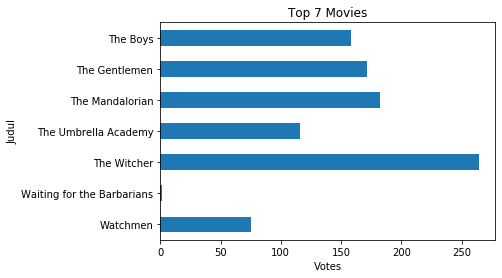

In [18]:
ax=df['Votes'].plot(kind='barh', title='Top 7 Movies')
ax.set_xlabel('Votes')
ax.set_ylabel('Judul')

Insights: 
- the fewest votes for the top 7 movies is The Gentlemen in about 200 less votes
- the highest votes for the top 7 movies is Joker in about 800 mmore votes
- there's a big amount of difference between the the no.1 and no.2 about 300 votes more or less

In [22]:
def scrap(url):
    #This is fuction for scrapping
    url_get = requests.get(url)
    soup = BeautifulSoup(url_get.content,"html.parser")
    
    #Find the key to get the information
    main_webpage = soup.find('div', attrs={'class':'article'}) 
    box_movie = soup.find_all('div', attrs={'class':'lister-item-content'}) 

    temp = [] #initiating a tuple

    for i in range(0, len(box_movie)):
        box_webpage = main_webpage.find_all('div', attrs={'class':'lister-item-content'})[i]

        #Get Title
        judul = box_webpage.find_all('a')[0].text

        #Get Rating
        imdb_rating = box_webpage.find_all('strong')[0].text

        #Get Metascore
        metascore = box_webpage.find('span', attrs={'class':'metascore favorable'})
        if metascore is not None:
            metascore = metascore.text.strip()
        else:
            metascore = None
        
        #Get Movie Votes
        votes = box_webpage.find_all('span', attrs={'name':'nv'})[0].text

        #use the key to take information here
        #name_of_object = row.find_all(...)[0].text






        temp.append((judul,imdb_rating,metascore,votes)) #append the needed information 
    
    temp

    dataset_movie = pd.DataFrame(temp, columns = ('Judul','Imdb_Rating','Metascore','Votes')) #creating the dataframe
   #data wranggling -  try to change the data type to right data type
    dataset_movie['Votes'] = dataset_movie['Votes'].apply(lambda x: x.replace(',','.'))
    dataset_movie['Metascore'] = pd.to_numeric(dataset_movie['Metascore'], errors='coerce')
    dataset_movie[['Imdb_Rating','Votes']] = dataset_movie[['Imdb_Rating','Votes']].astype('float64')
   
   #end of data wranggling

    return dataset_movie

In [23]:
scrap('https://imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

,Judul,Imdb_Rating,Metascore,Votes
0,The Umbrella Academy,8.0,NaN,115.769
1,The Boys,8.7,NaN,157.861
2,Knives Out,7.9,82.0,363.340
3,Jojo Rabbit,7.9,NaN,244.973
4,Doom Patrol,8.0,NaN,28.731
5,Euphoria,8.3,NaN,44.843
6,In the Dark,7.4,NaN,4.942
7,The Gentlemen,7.9,NaN,171.690
8,Charlie's Angels,4.7,NaN,47.747
9,Once Upon a Time... in Hollywood,7.7,83.0,499.627
